(540, 2500) (540,)


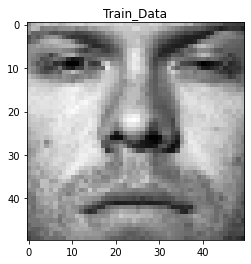

In [89]:
import numpy as np
from scipy import misc
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Train_Data')
plt.show()

Shape:  (100, 2500)


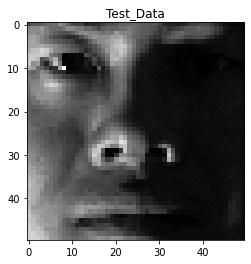

In [90]:
test_data, test_labels = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print('Shape: ', test_data.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Test_Data')
plt.show()

In [91]:
avg_face = np.mean(train_data,axis=0)

Shape:  (2500,)


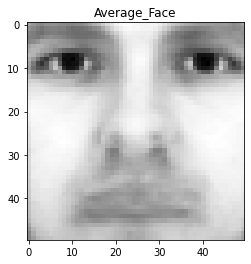

In [92]:
print('Shape: ', avg_face.shape)
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.title('Average_Face')
plt.show()

shape:  (540, 2500) 
 mean:  7.222061631856142e-16


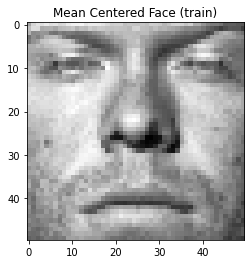

In [93]:
mean_centered_faces = train_data - avg_face
print('shape: ', mean_centered_faces.shape,'\n', 'mean: ',np.mean(mean_centered_faces))
plt.imshow(mean_centered_faces[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Mean Centered Face (train)')
plt.show()

shape:  (100, 2500) 
 mean:  1.3696176296296305


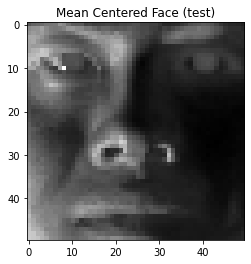

In [94]:
mean_centered_test_faces = test_data - avg_face
print('shape: ', mean_centered_test_faces.shape,'\n', 'mean: ',np.mean(mean_centered_test_faces))
plt.imshow(mean_centered_test_faces[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Mean Centered Face (test)')
plt.show()

In [95]:
U, S, V = np.linalg.svd(mean_centered_faces)

In [96]:
cov_mat = np.cov(mean_centered_faces)
cov_mat.shape

(540, 540)

In [97]:
#U, S, V = np.linalg.svd(cov_mat)

In [98]:
S.shape

(540,)

In [99]:
V.shape

(2500, 2500)

In [100]:
U.shape

(540, 540)

In [101]:
V_trans = V.T
V_trans.shape

(2500, 2500)

In [102]:
# reduced_X = np.dot(V_trans[:10,:],mean_centered_faces)
# reduced_X.shape

In [103]:
# reduced_X = np.dot(mean_centered_faces, V.T)
# reduced_X.shape

In [104]:
# plt.imshow(reduced_X[0, :].reshape(50,50), cmap = cm.Greys_r)
# plt.title('reduced_X')
# plt.show()

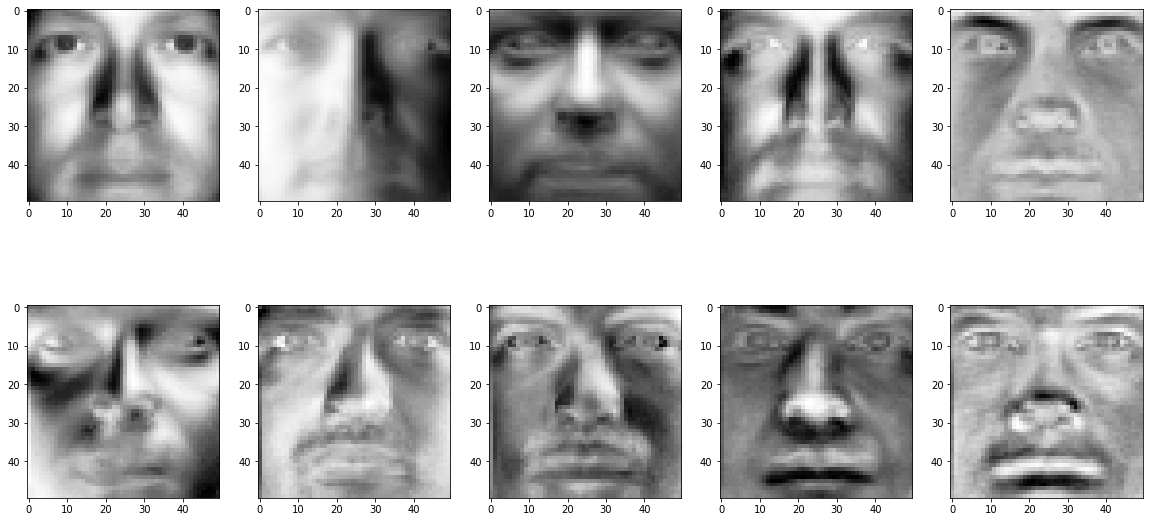

In [105]:
# Displaying first 10 faces
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(V[i, :].reshape(50,50), cmap = cm.Greys_r)



In [106]:
# # Displaying first 10 faces
# plt.figure(figsize=(20,10))
# for i in range(10):
#   plt.subplot(2, 5, i+1)
#   plt.imshow(reduced_X[i, :].reshape(50,50), cmap = cm.Greys_r)

In [107]:
approx_error = []
for r in range(200):
  low_rank_train = np.dot(U[:,:(r+1)],np.dot(np.diag(S[:(r+1)]),V[:(r+1),:]))
  approx_error = np.append(approx_error, np.linalg.norm(low_rank_train - mean_centered_faces,ord='fro'))

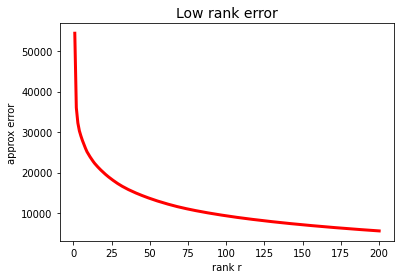

In [108]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 201), approx_error, 'r', linewidth=3)
plt.xticks(range(0, 201, 25))
plt.title("Low rank error", fontsize=14)
plt.xlabel('rank r')
plt.ylabel('approx error')
plt.show()

In [109]:
# top r featured eigen faces for train
r = 10
def eig_face(r):
  F = np.dot(mean_centered_faces, V[:(r+1),:].T)
  F_test = np.dot(mean_centered_test_faces, V[:(r+1),:].T)
  return F, F_test
F.shape, F_test.shape

((540, 10), (100, 10))

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
accuracy = []
model = LogisticRegression()
for r in range(0, 200):
  train_faces, test_faces = eig_face(r+1)
  model.fit(train_faces, train_labels)
  accuracy = np.append(accuracy, model.score(test_faces, test_labels))

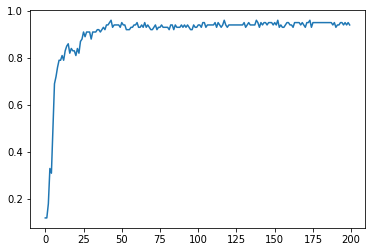

In [111]:
plt.plot(range(0, 200), accuracy)
plt.show()

In [112]:
print('Final Accuracy: ',accuracy[-1])

Final Accuracy:  0.94
